**NB:** This study involves use of time-varying data. Keep in mind that this analysis depends on the data at the moment of the study, meaning the results can change at the moment you run this notebook 

### Load and Extraction

In [233]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

One of the portfolio management principles for long-term investors is to diversify the nature of the stock in terms of the company's sector, location, etc. In my case, I mainly diversify in terms of popular sectors which are : Finance, Consumer discretionary, Consumer staples, Healthcare, Industrial, Energy and Technology. A location-type diversification was made by choosing stocks from France and USA. From here, the stocks were chosen randomly

In [234]:
# Load stocks data using Yahoo API

# Finance
bnp = yf.download('BNP.PA') # BNP Paribas

# Consumer discretionary
ips = yf.download('IPS.PA') # Ipsos

# Consumer staples
mmt = yf.download('MMT.PA') # Metropole TV
                  
# Healthcare
san = yf.download('SAN.PA') # Sanofi

# Industrial
dbg = yf.download('DBG.PA') # Derichbourg

# Energy
tte = yf.download('TTE.PA') # Total Energies Nouvelles

# Technology
acn = yf.download('ACN') # Accenture = stock américain
stm = yf.download('STMPA.PA') # STMicroelectrnoics

# Initiate the set of stocks 
set_stocks_df = ()

# Initiate the stock's names based on their mnemonic
stock_list_names = ['BNP', 'IPS','SAN','MMT','DBG','TTE','ACN','STM']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [235]:
# Check if the data were well-downloaded
stm

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-09-03,33.299999,33.509998,32.369999,33.509998,17.404114,3631641
2001-09-04,34.990002,35.099998,32.599998,34.180000,17.752096,7210915
2001-09-05,33.209999,33.299999,32.160000,32.400002,16.827620,6116195
2001-09-06,32.599998,32.939999,28.209999,28.299999,14.698197,15032414
2001-09-07,29.000000,29.600000,27.379999,29.150000,15.139656,13363294
...,...,...,...,...,...,...
2023-10-30,38.000000,38.259998,35.150002,35.264999,35.264999,3678065
2023-10-31,35.639999,36.360001,35.169998,35.980000,35.980000,2390264
2023-11-01,36.404999,36.855000,36.060001,36.134998,36.134998,1844285


### EDA part 1

The downloaded dataset contains stock information from the company's IPO (Initial Public Offering) date to the actual date. Since the chosen companies do not have the same IPO date, we must define a common interval of study.  A good practice is to choose the start of the interval to be the recent IPO date from our companies' list. Another approach is to have a predefined interval based on general time format (study stocks on a week, a month, a year or 2 , etc)

**NB:** To know more about IPO, check this link : https://en.wikipedia.org/wiki/Initial_public_offering

In [236]:
# Define the start date and end date prior to the data
list_stock = (bnp, ips, san, mmt, dbg, tte,  acn, stm) # the order should be the same as the list stock_list_names
length=[]
for stock_df in list_stock :
    length.append(len(stock_df.index))

# Check the number of values for each stock data
length

[7733, 5869, 6099, 6098, 6117, 6130, 5610, 5694]

In [237]:
# Check for the longest duration
ind_l =  np.array(length).argmax()
stock_list_names[ind_l]

'BNP'

In [238]:
# So the company BNP is the oldest stock based on its IPO;
# Duration for correlation
duration_corr = 660 #30 months of recording data

l = len(bnp.index) 

start_corr = bnp.index[l - duration_corr]
end_corr = bnp.index[-1]
[start_corr,end_corr]

[Timestamp('2021-04-14 00:00:00'), Timestamp('2023-11-03 00:00:00')]

With the new interval, we can extract the important data and check if there is a correlation among their daily normalized returns

In [239]:
counter = 0

# Initialize my table used for correlation
indices_corr = bnp[start_corr:end_corr].index #Extract indices
df_corr = pd.DataFrame(0,index = indices_corr,columns = stock_list_names)

# Assign values of normalized return inside that table
for stock_df in list_stock :
    stock_df_corr = stock_df[start_corr:end_corr]
    Norm_return_corr = stock_df_corr['Adj Close']/stock_df_corr.iloc[0]['Adj Close']
    df_corr[stock_list_names[counter]]=Norm_return_corr
    counter+=1
    
df_corr

,BNP,IPS,SAN,MMT,DBG,TTE,ACN,STM
Date,,,,,,,,
2021-04-14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-04-15,0.995768,1.010671,1.007262,1.003215,0.993919,0.992297,1.002496,0.993141
2021-04-16,1.017699,1.024390,1.012024,1.011790,0.993919,0.990991,1.008860,0.995428
2021-04-19,1.025972,1.015244,1.026309,0.996784,0.989865,0.993341,1.007383,0.971955
2021-04-20,0.977876,0.998476,1.024524,0.984995,0.967568,0.962528,1.014625,0.936443
...,...,...,...,...,...,...,...,...
2023-10-30,1.244628,1.529715,1.116162,0.767677,0.605164,1.927331,1.065797,1.092203
2023-10-31,1.257835,1.511912,1.136856,0.782898,0.596974,1.933756,1.081782,1.114347
2023-11-01,1.260383,1.492791,1.152111,0.782898,0.596974,1.946913,1.094708,1.119148


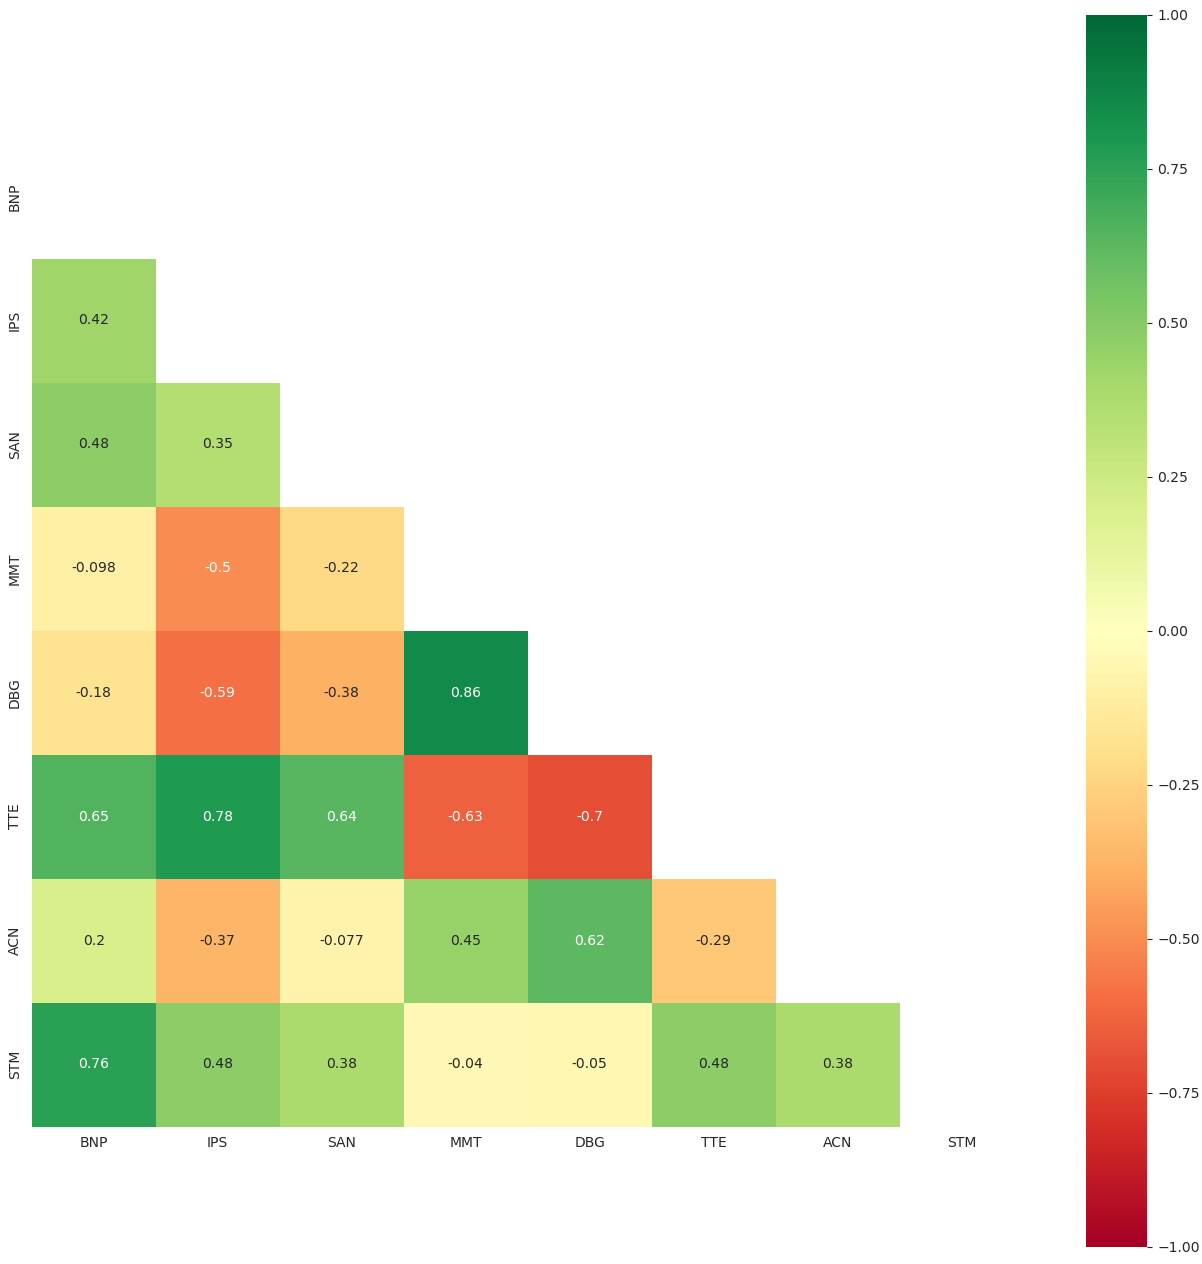

In [240]:
# Evaluate the matrix correlation
corr = df_corr.corr()

mask =  np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True #triu_indices is used to return the indices for the upper-triangle of an (n,m) array
with sns.axes_style("white"):
    f,ax  = plt.subplots(figsize=(16,16))
    ax = sns.heatmap(corr, vmin = -1, mask = mask, vmax = 1, cmap='RdYlGn', square = True, annot = True)

# color code :
# - The darker the color, higher is the correlation 
# - red and its nuances: denotes a negative correlation
# - yellow and its nuance: denotes a correlation almost null (in general the correlation is really weak in this case)
# - green and its nuances : a positive correlation

Most of the correlation are starting to be balanced: a certain amount for positive and negative. Beware that this result can be different at further updates depending on the macro and micro economic effects.

To get a better insight of this correlation, we can draw a scatter plot.

<Figure size 800x800 with 0 Axes>

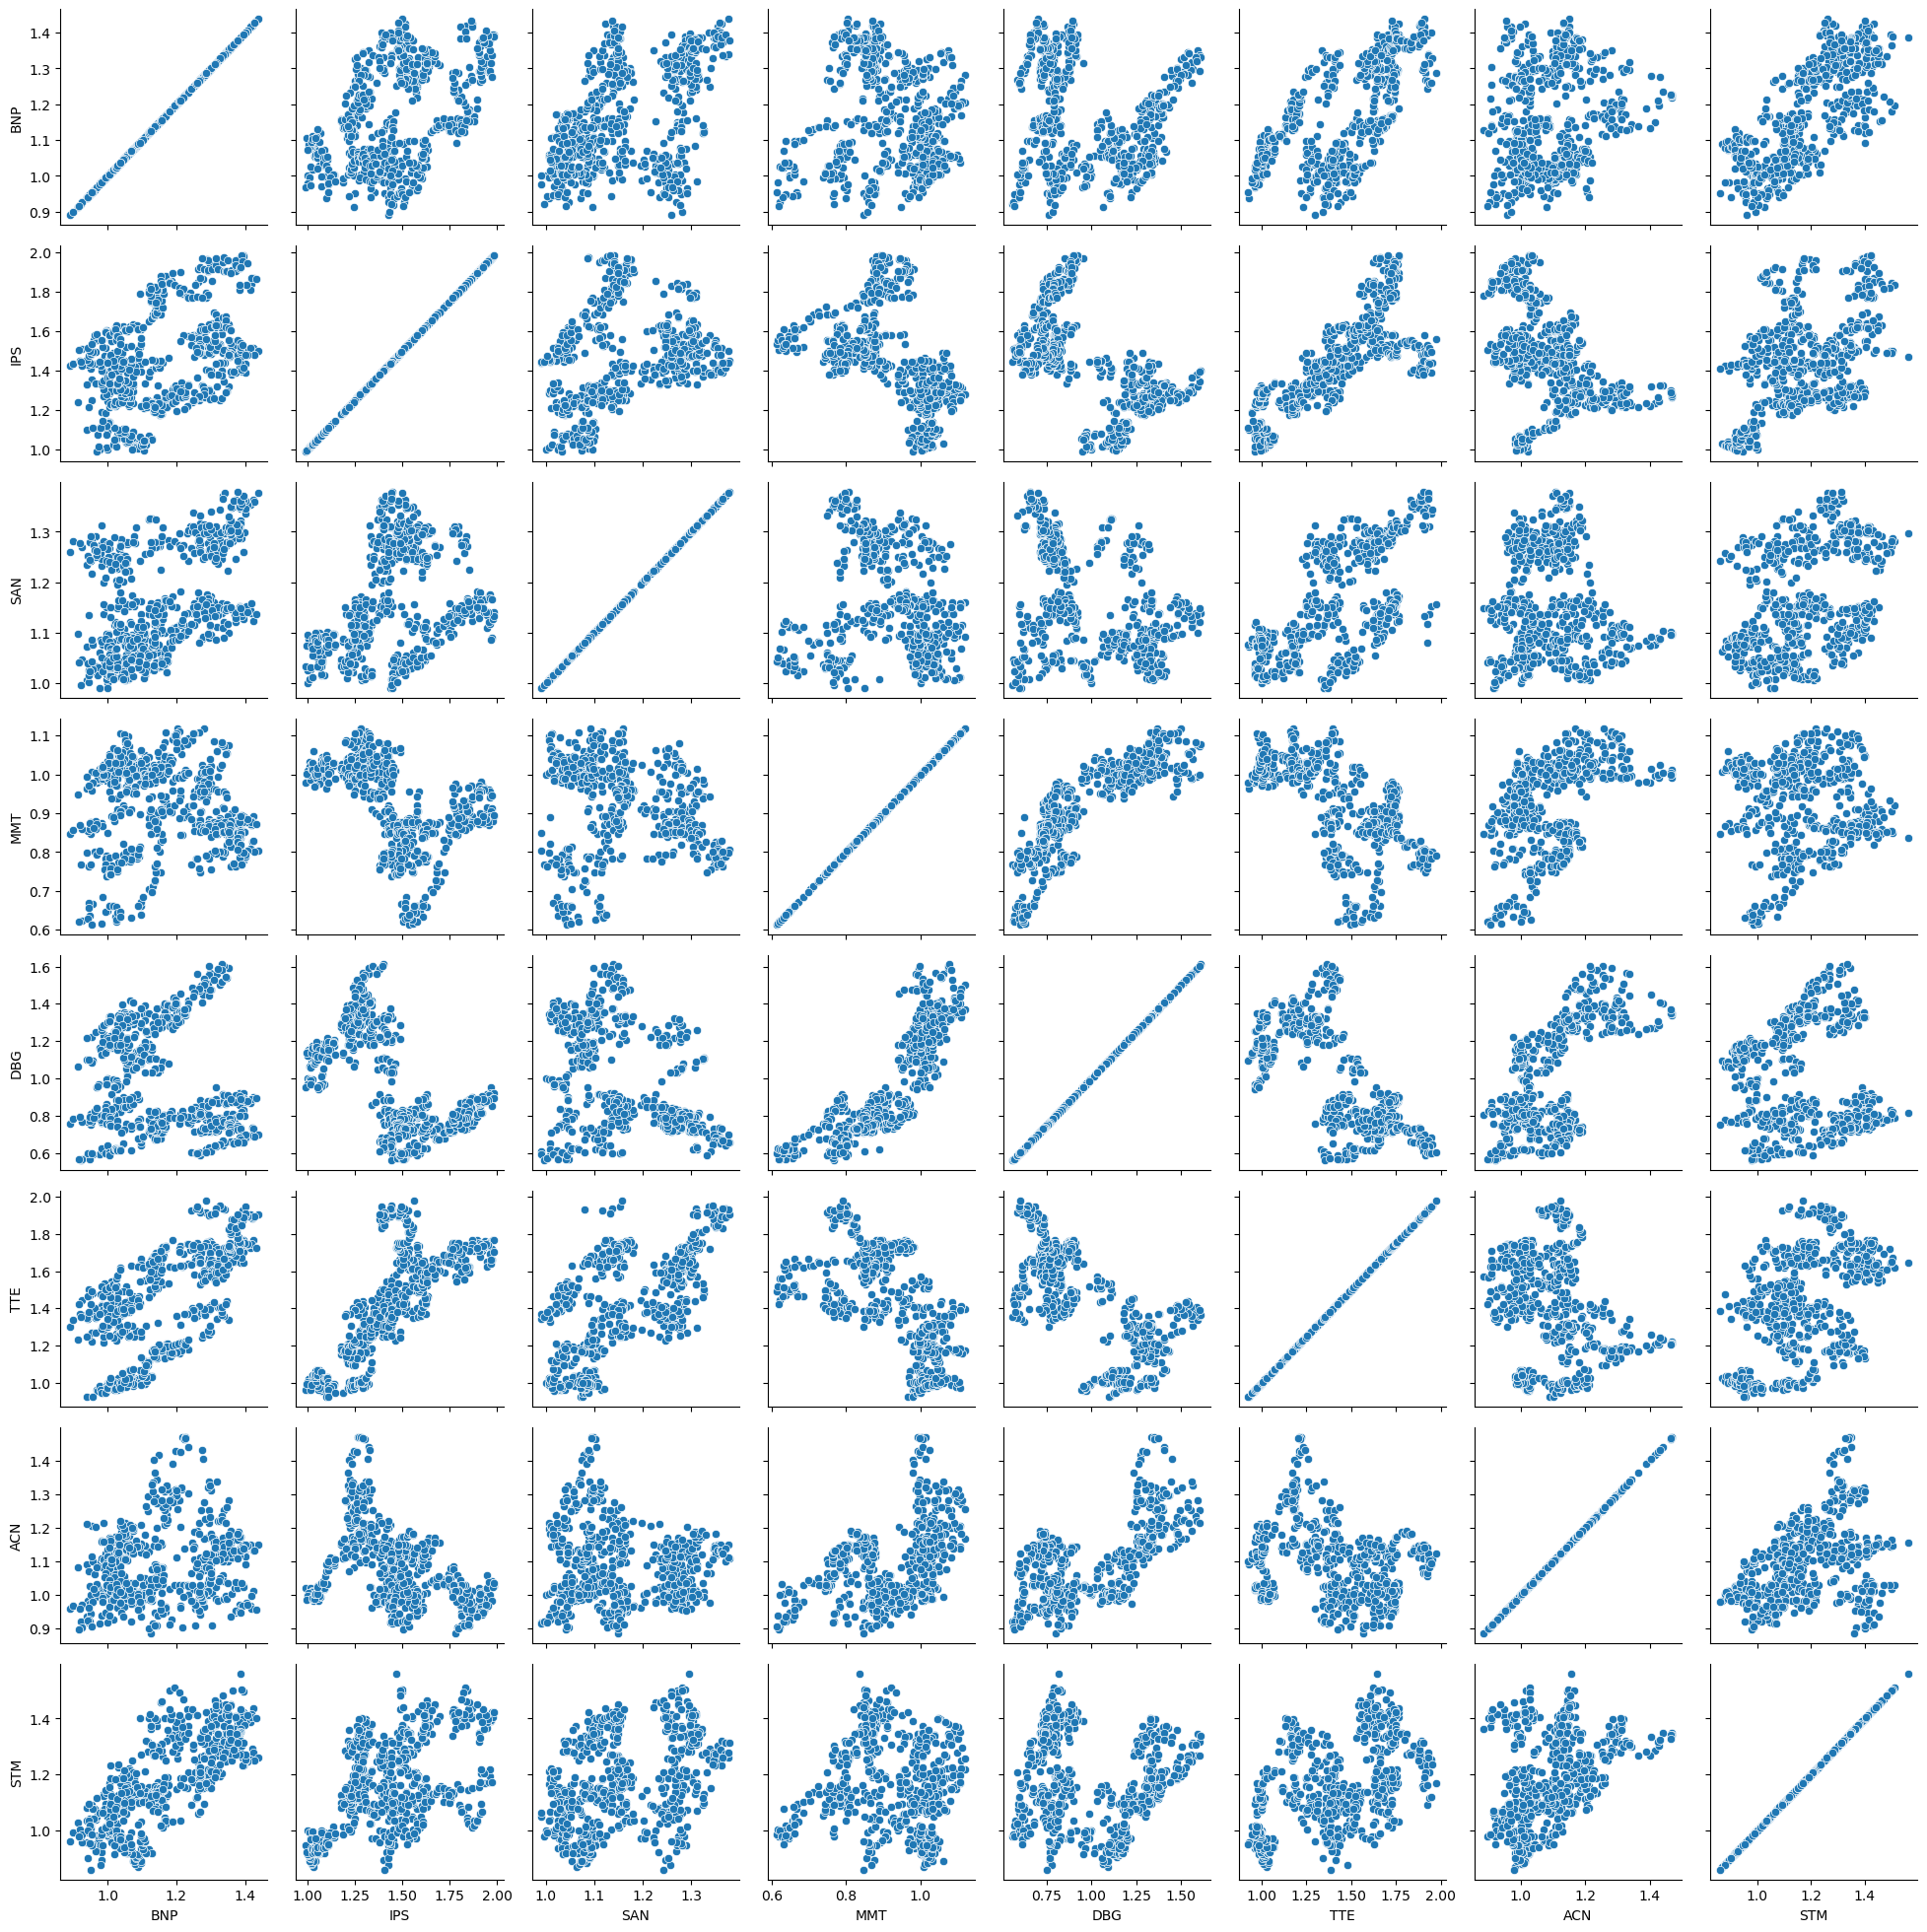

In [241]:
plt.figure(figsize=(8,8))
g = sns.PairGrid(df_corr)
g.map(sns.scatterplot)

### EDA part 2

In [242]:
# Duration for portfolio optimization 
start = start_corr
end = end_corr
[start,end]

[Timestamp('2021-04-14 00:00:00'), Timestamp('2023-11-03 00:00:00')]

In [243]:
bnp = bnp[start:end]

ips = ips[start:end]

san = san[start:end]

mmt = mmt[start:end]

dbg = dbg[start:end]

tte = tte[start:end]

acn = acn[start:end]
stm = stm[start:end]

acn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-14,284.380005,286.799988,283.079987,284.440002,274.630280,1903500
2021-04-15,286.260010,287.179993,284.410004,285.149994,275.315857,2047500
2021-04-16,285.160004,287.459991,285.010010,286.959991,277.063416,2625500
2021-04-19,287.100006,287.230011,284.910004,286.540009,276.657959,1437100
2021-04-20,285.929993,288.899994,285.760010,288.600006,278.646851,1889800
...,...,...,...,...,...,...
2023-10-30,291.739990,293.820007,289.660004,292.700012,292.700012,1843500
2023-10-31,293.079987,297.279999,293.079987,297.089996,297.089996,1953400
2023-11-01,298.170013,302.179993,298.170013,300.640015,300.640015,1973000


In this EDA part, it's really important that all the stocks have the same time basis. Stocks datetime are based on the working days of the country in which the stock is being exchanged. So it is influenced by the public holidays for instance, meaning that there could be datetimes in which USA stocks have missing values where as French stocks don't.
To sort this out, I define this rule: if a value at a date is not present in the usa stock, we take the value at its previous date

In [244]:
# Get the index dates for different stock exchange
usa_stock_dates = list(acn.index) 
fr_stock_dates = list(bnp.index) # any value of a french stock exchange will work here
stock_columns = acn.columns

# reshape usa stocks to have the same size of date index
if len(usa_stock_dates) < len(fr_stock_dates) :
    missing_dates = [x for x in fr_stock_dates if x not in usa_stock_dates]
    acn_fr=pd.DataFrame(0,fr_stock_dates,stock_columns) #initialize the new data
    date_prev = usa_stock_dates[0]
    for date in fr_stock_dates:
        for col in stock_columns:
            if date in usa_stock_dates:
                    acn_fr.loc[date,col]  = acn.loc[date,col]
                    date_prev = date
            else:
                    acn_fr.loc[date,col] = acn.loc[date_prev,col]

In [245]:
# get usd to euro parity 
usd2eur = yf.download('USDEUR=X')
usd2eur = usd2eur[start:end]

# convert usd to euro
change_columns_list = ['Open','High','Low','Close','Adj Close']
for col in change_columns_list: 
    acn_fr[col] = usd2eur[col]*acn_fr[col]

acn_fr

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-04-14,237.827002,239.962684,236.255731,237.942604,229.736476,1903500
2021-04-15,238.901147,240.160005,237.143897,237.900635,229.696014,2047500
2021-04-16,238.214113,240.534161,237.612845,239.697689,231.431079,2625500
2021-04-19,239.883538,240.491937,236.475298,239.392718,231.136660,1437100
2021-04-20,237.407665,240.174125,236.523565,239.595730,231.332620,1889800
...,...,...,...,...,...,...
2023-10-30,276.204831,278.544313,272.595560,277.113732,277.113732,1843500
2023-10-31,276.098930,281.313095,274.700944,279.876600,279.876600,1953400
2023-11-01,281.848183,287.164666,281.803468,284.182977,284.182977,1973000
2023-11-02,286.831504,291.829835,282.378352,291.034735,291.034735,2152800


### Pretreatment for Optimization

In [246]:
# Determine the cumulative normalized return for each stock
for stock_df in (bnp, ips, san, mmt, dbg, tte, acn_fr, stm) :
    stock_df['Norm return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [247]:
acn_fr

,Open,High,Low,Close,Adj Close,Volume,Norm return
2021-04-14,237.827002,239.962684,236.255731,237.942604,229.736476,1903500,1.000000
2021-04-15,238.901147,240.160005,237.143897,237.900635,229.696014,2047500,0.999824
2021-04-16,238.214113,240.534161,237.612845,239.697689,231.431079,2625500,1.007376
2021-04-19,239.883538,240.491937,236.475298,239.392718,231.136660,1437100,1.006095
2021-04-20,237.407665,240.174125,236.523565,239.595730,231.332620,1889800,1.006948
...,...,...,...,...,...,...,...
2023-10-30,276.204831,278.544313,272.595560,277.113732,277.113732,1843500,1.206224
2023-10-31,276.098930,281.313095,274.700944,279.876600,279.876600,1953400,1.218251
2023-11-01,281.848183,287.164666,281.803468,284.182977,284.182977,1973000,1.236995
2023-11-02,286.831504,291.829835,282.378352,291.034735,291.034735,2152800,1.266820


Now I test my allocation computation by considering a portfolio with equally distributed weights among stocks at my start time

In [248]:
weights_actu  = 12.5*np.ones(8)
weights_actu = [wt/100 for wt in weights_actu]
 
for stock_df,allo in zip([bnp, ips, san, mmt, dbg, tte, acn_fr, stm],weights_actu):
    stock_df['Allocation'] = stock_df['Norm return']* allo
    
sum(weights_actu)

1.0

In [249]:
acn_fr

,Open,High,Low,Close,Adj Close,Volume,Norm return,Allocation
2021-04-14,237.827002,239.962684,236.255731,237.942604,229.736476,1903500,1.000000,0.125000
2021-04-15,238.901147,240.160005,237.143897,237.900635,229.696014,2047500,0.999824,0.124978
2021-04-16,238.214113,240.534161,237.612845,239.697689,231.431079,2625500,1.007376,0.125922
2021-04-19,239.883538,240.491937,236.475298,239.392718,231.136660,1437100,1.006095,0.125762
2021-04-20,237.407665,240.174125,236.523565,239.595730,231.332620,1889800,1.006948,0.125868
...,...,...,...,...,...,...,...,...
2023-10-30,276.204831,278.544313,272.595560,277.113732,277.113732,1843500,1.206224,0.150778
2023-10-31,276.098930,281.313095,274.700944,279.876600,279.876600,1953400,1.218251,0.152281
2023-11-01,281.848183,287.164666,281.803468,284.182977,284.182977,1973000,1.236995,0.154624
2023-11-02,286.831504,291.829835,282.378352,291.034735,291.034735,2152800,1.266820,0.158352


In [250]:
# Check of the evolution of the money's portfolio 
initial_money = 10000 # in euros
for stock_df in (bnp,ips, san, mmt, dbg, tte, acn_fr, stm):
    stock_df['Position values'] = stock_df['Allocation']*initial_money

In [251]:
# Create a portfolio with the invested money
all_pos_vals =[bnp['Position values'], 
               ips['Position values'], 
               san['Position values'],
               mmt['Position values'],
               dbg['Position values'],
               tte['Position values'],
               acn_fr['Position values'],stm['Position values']]

# axis = 1 to modify the columns, axis = 0 to modify the rows
portfolio = pd.concat(all_pos_vals,axis=1) 
columns =['BNP Pos val','IPS Pos val','SAN Pos val',
          'MMT Pos val','DBG Pos val',
          'TTE Pos val','ACN Pos val','STM Pos val']
portfolio.columns = columns
portfolio['Total pos'] = portfolio.sum(axis=1)
portfolio

,BNP Pos val,IPS Pos val,SAN Pos val,MMT Pos val,DBG Pos val,TTE Pos val,ACN Pos val,STM Pos val,Total pos
2021-04-14,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,10000.000000
2021-04-15,1244.709454,1263.338573,1259.077214,1254.019051,1242.398684,1240.371195,1249.779848,1241.426580,9995.120599
2021-04-16,1272.123891,1280.487763,1265.029760,1264.737256,1242.398684,1238.739013,1259.220363,1244.284387,10067.021116
2021-04-19,1282.464474,1269.054891,1282.886763,1245.980555,1237.331024,1241.676707,1257.618427,1214.944278,10031.957117
2021-04-20,1222.345275,1248.094456,1280.654749,1231.243141,1209.459502,1203.160027,1258.684646,1170.553167,9824.194962
...,...,...,...,...,...,...,...,...,...
2023-10-30,1555.785565,1912.143844,1395.201903,959.595885,756.454380,2409.163787,1507.780442,1365.253301,11861.379108
2023-10-31,1572.293332,1889.890409,1421.069643,978.622316,746.217159,2417.195573,1522.813252,1392.933900,11941.035585
2023-11-01,1575.479061,1865.988536,1440.138864,978.622316,746.217159,2433.641694,1546.244320,1398.934541,11985.266492
2023-11-02,1609.073830,1950.056964,1445.942508,990.203674,754.260684,2470.358407,1583.524848,1460.296528,12263.717443


Text(0, 0.5, 'Total position')

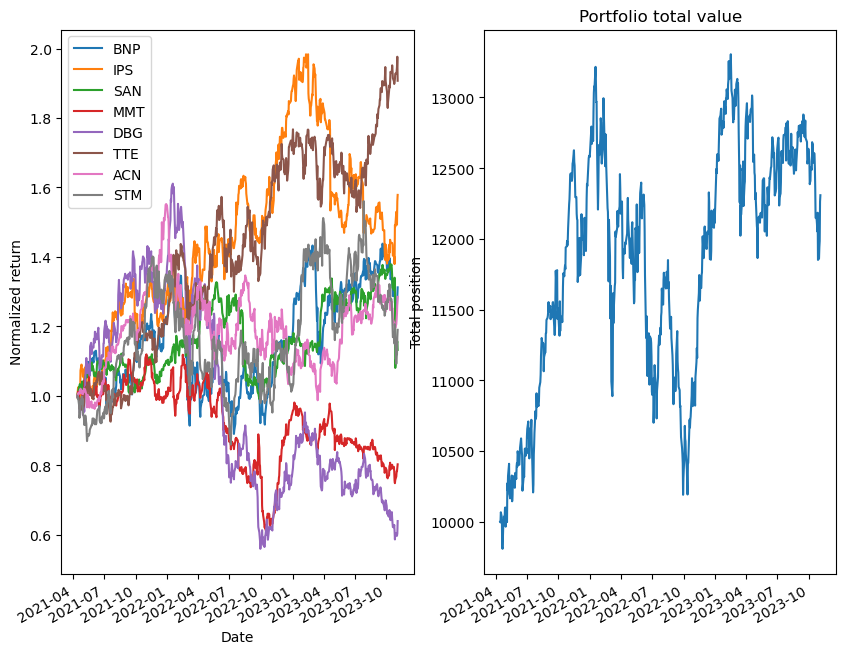

In [252]:
# Visualize the normalized return and the portfolio's total value
fig,axes = plt.subplots(1,2)

bnp['Norm return'].plot(figsize=(10,8), label='BNP', ax = axes[0])

ips['Norm return'].plot(figsize=(10,8), label='IPS', ax = axes[0])

san['Norm return'].plot(figsize=(10,8), label='SAN', ax = axes[0])

mmt['Norm return'].plot(figsize=(10,8), label='MMT', ax = axes[0])

dbg['Norm return'].plot(figsize=(10,8), label='DBG', ax = axes[0])

tte['Norm return'].plot(figsize=(10,8), label='TTE', ax = axes[0])

acn_fr['Norm return'].plot(figsize=(10,8), label='ACN', ax = axes[0])

stm['Norm return'].plot(figsize=(10,8), label='STM', ax = axes[0])

axes[0].set(ylabel = 'Normalized return')
axes[0].legend()


portfolio['Total pos'].plot(figsize=(10,8), ax =axes[1])
axes[1].set(title = 'Portfolio total value')
plt.ylabel('Total position')

It means that if someone invested 10k and chose an equally- distributed weights portfolio at the 14-04-2021, it would earn around 12.3 k now. 

Let's check for statistical conditions to apply the optimization techniques 

In [253]:
# Daily return
portfolio['Daily Return']=portfolio['Total pos'].pct_change(1)
portfolio['Daily Return']

2021-04-14         NaN
2021-04-15   -0.000488
2021-04-16    0.007194
2021-04-19   -0.003483
2021-04-20   -0.020710
                ...   
2023-10-30    0.000832
2023-10-31    0.006716
2023-11-01    0.003704
2023-11-02    0.023233
2023-11-03    0.003693
Name: Daily Return, Length: 660, dtype: float64

In [254]:
# Mean of the daily return
portfolio['Daily Return'].mean()

0.00038021097737152873

In [255]:
# Standard deviation of the daily return
portfolio['Daily Return'].std()

0.011392388470662568

<AxesSubplot: ylabel='Density'>

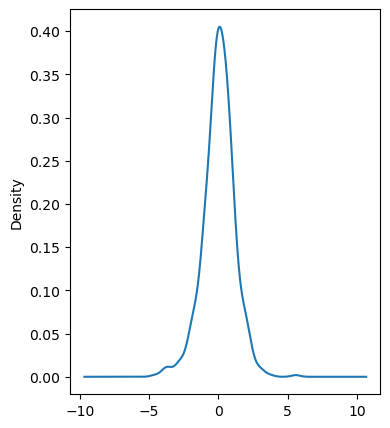

In [256]:
#It's necessary for the distribution of the daily return to be normal before optimization
(100*portfolio['Daily Return']).plot(kind='kde',figsize=(4,5))

### Applications of the modern portfolio theory (MPT)

The modern portfolio theory is a concept that suggests that when creating a portfolio of assets, the expected return is maximized for a given level of risk. It calls for a mean-variance analysis where the mean of the return values is the representation of the overall expected return and the associated risk is given by the standard deviation of the return values.

In other words, the problem consists of maximizing the ratio : expected return / risk which is called the Sharpe ratio.
This MPT sits on the concept of diversification in which holiding combinations of instruments that are not perfectly positively correlated reduce the exposure to risk and therefore improves the Sharpe ratio. 

For more documentation, visit those websites :

https://corporatefinanceinstitute.com/resources/wealth-management/modern-portfolio-theory-mpt/
https://en.wikipedia.org/wiki/Modern_portfolio_theory#:~:text=Modern%20portfolio%20theory%20(MPT)%2C,a%20given%20level%20of%20risk.
https://www.investopedia.com/articles/07/sharpe_ratio.asp

In [257]:
# Cumulative return
cumulative_return = 100*(portfolio['Total pos'][end]/(portfolio['Total pos'][0]-1))
cumulative_return

123.10232871128468

In [258]:
# Daily Sharpe ratio
ratio_sharp_daily = portfolio['Daily Return'].mean()/portfolio['Daily Return'].std()
ratio_sharp_daily

0.03337412328860096

In [259]:
# Annnual Sharpe ratio
ratio_sharp_yearly = (252**0.5)*ratio_sharp_daily
ratio_sharp_yearly

0.5297977826786837

In [260]:
## Determine statistical elements for each stock value
# Daily return
for stock_df in (bnp, ips,san, mmt,dbg, tte,acn_fr, stm):
    stock_df['Daily Return'] = stock_df['Adj Close'].pct_change(1)
    
acn_fr

,Open,High,Low,Close,Adj Close,Volume,Norm return,Allocation,Position values,Daily Return
2021-04-14,237.827002,239.962684,236.255731,237.942604,229.736476,1903500,1.000000,0.125000,1250.000000,NaN
2021-04-15,238.901147,240.160005,237.143897,237.900635,229.696014,2047500,0.999824,0.124978,1249.779848,-0.000176
2021-04-16,238.214113,240.534161,237.612845,239.697689,231.431079,2625500,1.007376,0.125922,1259.220363,0.007554
2021-04-19,239.883538,240.491937,236.475298,239.392718,231.136660,1437100,1.006095,0.125762,1257.618427,-0.001272
2021-04-20,237.407665,240.174125,236.523565,239.595730,231.332620,1889800,1.006948,0.125868,1258.684646,0.000848
...,...,...,...,...,...,...,...,...,...,...
2023-10-30,276.204831,278.544313,272.595560,277.113732,277.113732,1843500,1.206224,0.150778,1507.780442,0.009363
2023-10-31,276.098930,281.313095,274.700944,279.876600,279.876600,1953400,1.218251,0.152281,1522.813252,0.009970
2023-11-01,281.848183,287.164666,281.803468,284.182977,284.182977,1973000,1.236995,0.154624,1546.244320,0.015387
2023-11-02,286.831504,291.829835,282.378352,291.034735,291.034735,2152800,1.266820,0.158352,1583.524848,0.024110


In [261]:
# Compute expected return - risk or volatility - Sharpe ratio
list_return = []
list_volatility = []
list_ratio_sharpe = []

log_ret = 0
ret_stock = 0
vol_stock = 0
asr_stock = 0

for stock_df in (bnp,ips, san, mmt, dbg, tte,acn_fr, stm):
    log_ret = np.log(stock_df['Adj Close']/stock_df['Adj Close'].shift(1))
    ret_stock=np.sum(log_ret.mean())*252 # mean annual return
    vol_stock=np.sqrt(log_ret.std()*252) # annual volatility
    asr_stock= ret_stock / vol_stock # Sharpe ratio
    
    list_return.append(ret_stock)
    list_volatility.append(vol_stock)
    list_ratio_sharpe.append(asr_stock)

In [262]:
# Creating a dataframe containing all the adjusted price at closing

stocks =pd.concat([bnp['Adj Close'],
                   ips['Adj Close'],
                   san['Adj Close'],
                   mmt['Adj Close'],
                   dbg['Adj Close'],
                   tte['Adj Close'],
                   acn_fr['Adj Close'],stm['Adj Close']],axis=1)
columns = ['BNP',
           'IPS',
           'SAN',
           'MMT',
           'DBG',
           'TTE',
           'ACN','STM']
stocks.columns = columns
stocks

,BNP,IPS,SAN,MMT,DBG,TTE,ACN,STM
2021-04-14,43.161476,30.332447,75.383354,15.110528,6.837821,32.682503,229.736476,32.287964
2021-04-15,42.978798,30.656120,75.930771,15.159112,6.796240,32.430748,229.696014,32.066509
2021-04-16,43.925396,31.072262,76.289749,15.288678,6.796240,32.388073,231.431079,32.140327
2021-04-19,44.282448,30.794832,77.366646,15.061939,6.768519,32.464882,231.136660,31.382462
2021-04-20,42.206581,30.286207,77.232040,14.883787,6.616055,31.457825,231.332620,30.235823
...,...,...,...,...,...,...,...,...
2023-10-30,53.720001,46.400002,84.139999,11.600000,4.138000,62.990002,277.113732,35.264999
2023-10-31,54.290001,45.860001,85.699997,11.830000,4.082000,63.200001,279.876600,35.980000
2023-11-01,54.400002,45.279999,86.849998,11.830000,4.082000,63.630001,284.182977,36.134998
2023-11-02,55.560001,47.320000,87.199997,11.970000,4.126000,64.589996,291.034735,37.720001


In [263]:
# Use the logarithmic format to avoid disparities between return values 
log_ret = np.log(stocks/stocks.shift(1))

In [264]:
# Compute expected return - risk or volatility - Sharpe ratio with the actual weights
weights_actu = np.array(weights_actu)
ret_actu=np.sum(log_ret.mean()*weights_actu)*252 # mean annual return
vol_actu=np.sqrt(np.dot(weights_actu.T,np.dot(log_ret.cov()*252,weights_actu))) # annual volatility
asr_actu = ret_actu / vol_actu # Sharpe Ratio
asr_actu

0.32715168940869777

### Portofolio Optimization with Monte Carlo method
This method consists of allocating randomly weights and evaluating the Sharpe ratio. The process is repeated several times and the optimal allocation is the one giving the highest Sharpe ratio. This approach is ideal when there are few assets to allocate, mainly because it is time-consuming 

In [265]:
# Function that calculates the return and risk for a portfolio with given weights

def get_ret_risk_arr(weights, isStdRisk = False):
    
    # weights: defined the allocation in percentage for each asset
    # isStdRisk: if equal to False, then the risk is calculated as the realized volatility. 
    # If equal to True, it is given by the standard deviation of the return 
    
    # Return calculation (252 for the number of trading days in a year)
    return_arr= np.sum(log_ret.mean()*weights*252)
    
    # Risk Calculation
    if isStdRisk :
        vol_arr = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    else :
       # realized_vol_per_asset = np.nansum(log_ret**2)
        #realized_vol_per_asset_weighted = realized_vol_per_asset*weights
        #realized_vol_portfolio = np.dot(weights.T,realized_vol_per_asset_weighted)
        #vol_arr = np.sqrt(realized_vol_portfolio) 
        vol_arr = np.sqrt(np.dot(weights.T,log_ret.var()*252 * weights))

    return return_arr, vol_arr

In [266]:
np.random.seed(101) 

num_ports = 50000 ; # repeating times
isStdRisk = False

# Initialisation
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for ind in range(num_ports) :
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights) # Creation of random weights

    # Saving the weights
    all_weights[ind,:] = weights
    
    # Return calculation 
    ret_arr[ind]= get_ret_risk_arr(weights, isStdRisk)[0]

    # Risk Calculation
    vol_arr[ind] = get_ret_risk_arr(weights, isStdRisk)[1]

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

print('Done with the Monte Carlo shots. Finding the best allocation ...')

ind_opti = sharpe_arr.argmax()
sharpe_opti = sharpe_arr[ind_opti]
print('Highest Sharpe ratio :', sharpe_opti)
      
# Expected return with optimal allocation
ret_opti = ret_arr[ind_opti]
print('Expected return :', 100* ret_opti, ' %')
# Volatility with optimal allocation
vol_opti = vol_arr[ind_opti]
print('Expected volatility :', 100*vol_opti, ' %')
# Optimal allocation
weights_opti_mc = all_weights[ind_opti,:]
stck_names = columns
for ind in range(len(stck_names)):
    print('optimal allocation for ',stck_names[ind],':',100*weights_opti_mc[ind],'%' )

Done with the Monte Carlo shots. Finding the best allocation ...
Highest Sharpe ratio : 1.1829643920178383
Expected return : 14.638023913798259  %
Expected volatility : 12.374019042812852  %
optimal allocation for  BNP : 15.725751939489111 %
optimal allocation for  IPS : 17.82542377223221 %
optimal allocation for  SAN : 11.193261639242008 %
optimal allocation for  MMT : 0.04388480389511813 %
optimal allocation for  DBG : 0.4663990667027159 %
optimal allocation for  TTE : 30.12904394387958 %
optimal allocation for  ACN : 12.557751754993182 %
optimal allocation for  STM : 12.058483079566079 %


Let's assess the ASR (Annual Sharpe Ratio) of the companies composing the optimal portfolio

In [267]:
# Create a class company to populate with the needed data
class company:
    stocks=''
    asr=0
    def __init__(self, stocks, asr):
        self.stocks = stocks
        self.asr = asr

In [268]:
# Create a palette of colors for the plot

colorset=[]
for ind in range(len(stck_names)):
   colorset.append(np.random.rand(4))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Annual Sharpe Ratio  (ASR)  of companies in the portfolio
-------------------------------------------------------------

 NB: the greater the ASR, the better the ratio risk/return

 DBG : -0.07

 MMT : -0.04

 SAN : 0.02

 STM : 0.03

 ACN : 0.05

 BNP : 0.05

 IPS : 0.08

 TTE : 0.12


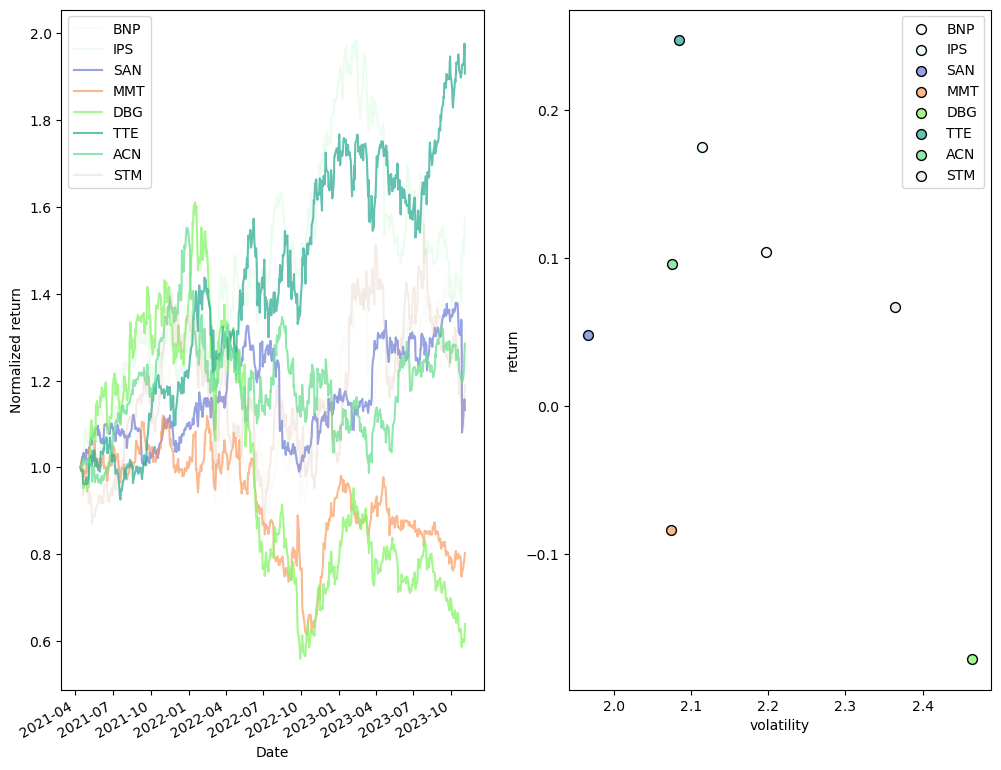

In [269]:
fig,axes = plt.subplots(nrows=1,ncols=2)

plt.figure(1)
plt.subplot(1,2,1)
bnp['Norm return'].plot(figsize=(12,10), c= colorset[0],label='BNP')
ips['Norm return'].plot(figsize=(12,10), c= colorset[1], label='IPS')
san['Norm return'].plot(figsize=(12,10),  c= colorset[2], label='SAN')
mmt['Norm return'].plot(figsize=(12,10),  c= colorset[3], label='MMT')
dbg['Norm return'].plot(figsize=(12,10),   c= colorset[4],label='DBG')
tte['Norm return'].plot(figsize=(12,10),   c= colorset[5],label='TTE')
acn_fr['Norm return'].plot(figsize=(12,10),   c= colorset[6],label='ACN')
stm['Norm return'].plot(figsize=(12,10), c= colorset[7], label='STM')
plt.ylabel('Normalized return')
plt.legend()

plt.subplot(1,2,2)
num_stocks = len(columns)

for ind in range(num_stocks) :
     plt.scatter(list_volatility[ind],list_return[ind],s=50, c= colorset[ind], edgecolors ='black',label = columns[ind])

plt.xlabel('volatility')
plt.ylabel('return')
plt.legend()


companies_list=[]
for ind in range(len(stck_names)):
      companies_list.append(company(stck_names[ind],list_ratio_sharpe[ind]))

companies_list.sort(key=lambda s:s.asr)

print('Annual Sharpe Ratio ','(ASR)',' of companies in the portfolio')
print('-------------------------------------------------------------')
print('\n NB: the greater the ASR, the better the ratio risk/return')

for cmp in companies_list:
     print('\n',cmp.stocks,':',round(cmp.asr,2))

As we can see, IPS and TTE have the highest ASR. That's why the optimization allocated more weight to them 

It should be keep in mind that the randow weights given by the Monte Carlo method represent respectively an investment portfolio. Thus, it is possible to visualize their performance on a return - volatility - ASR basis. From there, it's easier how good the optimal portfolio will perform with respect to the other portfolios

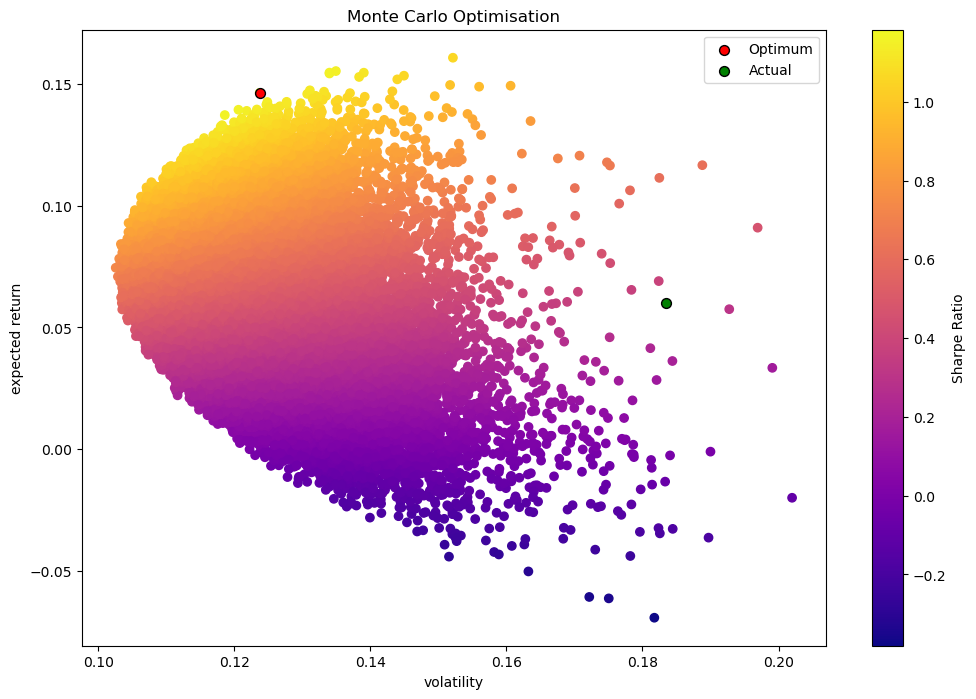

In [270]:
# Visualization of the combinations given by Monte Carlo
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('expected return')

plt.scatter(vol_opti,ret_opti,c='red',s=50, edgecolors ='black', label = 'Optimum')
plt.scatter(vol_actu,ret_actu,c='green',s=50, edgecolors ='black', label = 'Actual')

plt.title('Monte Carlo Optimisation')
plt.legend()

Recall that the actual portfolio has equal weights for each stock. We can see that the optimal portfolio takes higher risk to catch a more important return. Also, there exists point with expected return greater than that of the optimal portfolio. However, the subsequent risk is greater but not interesting from an ASR viewpoint. 
Let's evaluate the total gross money of our optimal portfolio 

In [271]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,Norm return,Allocation,Position values,Daily Return
Date,,,,,,,,,,
2021-04-14,32.985001,33.259998,32.779999,32.805000,32.287964,2165543,1.000000,0.125000,1250.000000,NaN
2021-04-15,32.799999,33.099998,32.459999,32.580002,32.066509,2146976,0.993141,0.124143,1241.426580,-0.006859
2021-04-16,32.564999,32.705002,32.139999,32.654999,32.140327,2118635,0.995428,0.124428,1244.284387,0.002302
2021-04-19,32.700001,32.810001,31.860001,31.885000,31.382462,2038583,0.971955,0.121494,1214.944278,-0.023580
2021-04-20,31.799999,32.075001,30.594999,30.719999,30.235823,3648461,0.936443,0.117055,1170.553167,-0.036538
...,...,...,...,...,...,...,...,...,...,...
2023-10-30,38.000000,38.259998,35.150002,35.264999,35.264999,3678065,1.092203,0.136525,1365.253301,-0.060602
2023-10-31,35.639999,36.360001,35.169998,35.980000,35.980000,2390264,1.114347,0.139293,1392.933900,0.020275
2023-11-01,36.404999,36.855000,36.060001,36.134998,36.134998,1844285,1.119148,0.139893,1398.934541,0.004308


In [272]:
# Total gross money - Monte Carlo
for stock_df,allo in zip([bnp, ips,  san, mmt, dbg, tte,acn_fr, stm],weights_opti_mc):
    stock_df['Opti allocation mc'] = stock_df['Norm return']* allo
    
for stock_df in (bnp, ips, san, mmt,  dbg, tte, acn_fr,stm):
    stock_df['Position values opti mc'] = stock_df['Opti allocation mc']*initial_money

all_pos_vals_opti_mc =[bnp['Position values opti mc'],
                       ips['Position values opti mc'],
                       san['Position values opti mc'],
                       mmt['Position values opti mc'], 
                       dbg['Position values opti mc'],
                       tte['Position values opti mc'],
                       acn_fr['Position values opti mc'],stm['Position values opti mc']]

portfolio_opti_mc = pd.concat(all_pos_vals_opti_mc,axis=1) 
columns =['BNP Pos val','IPS Pos val','SAN Pos val','MMT Pos val','DBG Pos val','TTE Pos val','ACN Pos val','STM Pos val']
portfolio_opti_mc.columns = columns
portfolio_opti_mc['Total pos'] = portfolio_opti_mc.sum(axis=1)

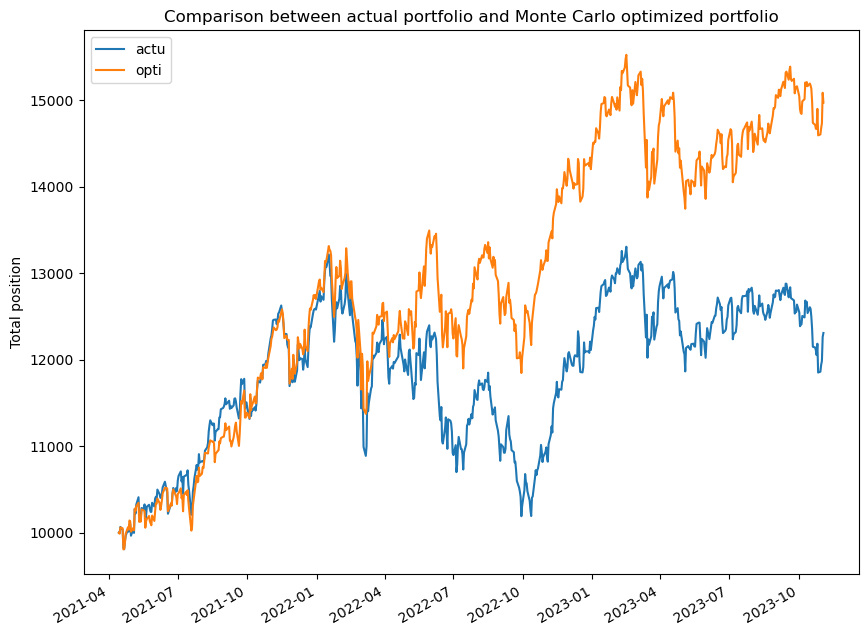

In [273]:
# Portfolio Benchmmark
portfolio['Total pos'].plot(figsize=(10,8), label='actu')
portfolio_opti_mc['Total pos'].plot(figsize=(10,8), label='opti')
plt.title('Comparison between actual portfolio and Monte Carlo optimized portfolio')
plt.ylabel('Total position')
plt.legend()

### Portofolio Optimization with Least Squares Error Method
It is a standard approach that consists of minimizing the sum of the squares of the residuals. the residual is defined as the the difference between the observed value and the fitted value. In our case, the 

It is a more stable and efficient because it provides a quicker convergence and thus it's ideal when the portfolio has a lot of assets to allocate

To perform this algorithm, some steps need to be achieved :

**- Define the function F to minimize :** In our case, since we want to maximize the Sharpe ratio, the function to minimize will be the negative value of the ASR

**- Initialize the variable linked to F :** In our case, we initialize the weights of the stocks

**- Define any related constraint :** In our case, a general constraint is to always check that the sum of our weights should be 100% or 1 depending if we are in percent-based or unit-based. 

**- Define the variables' boundaries (if they exist):** To simplify the problem, we will just check that all the weights have the same boundaries. It should be noted that the possibility to set the boundaries gives an important leverage since in real life, the stock market status can disadvantage one or several sectors , thus we can adjust the limit of the weights of companies impacted knowing this

In [274]:
# we define a function that returns the necessary metrics when we input a set of weights
def portfolio_metrics(weights, isStdRisk = False) :
    ret = get_ret_risk_arr(weights, isStdRisk)[0]
    vol = get_ret_risk_arr(weights, isStdRisk)[1]
    asr = ret / vol
    
    return np.array([ret, vol, asr])

In [275]:
# Function to minimize 
def neg_sharpe(weights, isStdRisk = False):
    return portfolio_metrics(weights, isStdRisk)[2]*(-1)

In [276]:
# Initialization of the problem with a portfolio of equally-distributed weights 
equal_weights = np.ones(len(stck_names))/len(stck_names) # create an even-weighted portfolio
init_guess = equal_weights

In [277]:
# Constraints
def check_sum(weights) :
    # return 0 if the sum of weights is equal to 1
    return np.sum(weights)-1

In [278]:
# The declaration of the constraints is made using tuple
cons =({'type': 'eq','fun': check_sum})

In [279]:
# The declaration of the boundaries is made using tuples, each tuple representing the min and max of each stock's weight
# In our case, we want our optimization to give at least a weight (> 1%) to a stock and a stock doesn't not represent 
# more than 50% of the portfolio
bound = (0.01,0.5)
bounds = ((bound, ) * len(stock_list_names))

In [280]:
# We can now launch our algorithm thanks to the minimize function from the scipy module.

from scipy.optimize import minimize

# SLSQP stands for Sequential least Squares Programming optimizer
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds = bounds, constraints = cons)

opt_results #check the results

     fun: -1.2099795669838351
     jac: array([-0.02232476, -0.01997159, -0.02240026,  0.69295488,  1.40837367,
       -0.02177615, -0.02163492, -0.02177769])
 message: 'Optimization terminated successfully'
    nfev: 86
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.11839666, 0.23484716, 0.08131297, 0.01      , 0.01      ,
       0.35278815, 0.13705614, 0.05559892])

The optimisation is successful. As we can see, the 'fun' field gives the optimal value of the Sharpe Ratio related the function to optimize (thus in a negated form) and the 'x' field give the value that optimizs f. We iterate just 8 times to converge to the solution which would have been impossible with the Monte Carlo algorithm 

In [281]:
# Check the optimized weights
for ind in range(len(stck_names)):
    print('optimal allocation for ',stck_names[ind],':',100*opt_results.x[ind],'%' )
    
sum(opt_results.x)

optimal allocation for  BNP : 11.839666329455977 %
optimal allocation for  IPS : 23.48471626888302 %
optimal allocation for  SAN : 8.13129686533532 %
optimal allocation for  MMT : 1.0000000000000107 %
optimal allocation for  DBG : 1.0000000000000158 %
optimal allocation for  TTE : 35.2788146646841 %
optimal allocation for  ACN : 13.705613891298485 %
optimal allocation for  STM : 5.559891980343097 %


1.0000000000000002

In [282]:
# Evaluate the metrics for initial and final value
print('Metrics (in this order : return - risk - ASR)')
print('initial guess:', portfolio_metrics(init_guess)) 
print('final guess:', portfolio_metrics(opt_results.x))

Metrics (in this order : return - risk - ASR)
initial guess: [0.0600228  0.10629702 0.56467052]
final guess: [0.15854377 0.13103012 1.20997957]


In [283]:
# Total gross money - LSE minimization
weights_opti_mm = opt_results.x
for stock_df,allo in zip([bnp, ips,  san, mmt, dbg, tte,acn_fr, stm],weights_opti_mm):
    stock_df['Opti allocation mm'] = stock_df['Norm return']* allo
    
for stock_df in (bnp, ips, san, mmt,  dbg, tte, acn_fr,stm):
    stock_df['Position values opti mm'] = stock_df['Opti allocation mm']*initial_money

all_pos_vals_opti_mm =[bnp['Position values opti mm'],
                       ips['Position values opti mm'],
                       san['Position values opti mm'],
                       mmt['Position values opti mm'], 
                       dbg['Position values opti mm'],
                       tte['Position values opti mm'],
                       acn_fr['Position values opti mm'],stm['Position values opti mm']]

portfolio_opti_mm = pd.concat(all_pos_vals_opti_mm,axis=1) 
columns =['BNP Pos val','IPS Pos val','SAN Pos val','MMT Pos val','DBG Pos val','TTE Pos val','ACN Pos val','STM Pos val']
portfolio_opti_mm.columns = columns
portfolio_opti_mm['Total pos'] = portfolio_opti_mm.sum(axis=1)

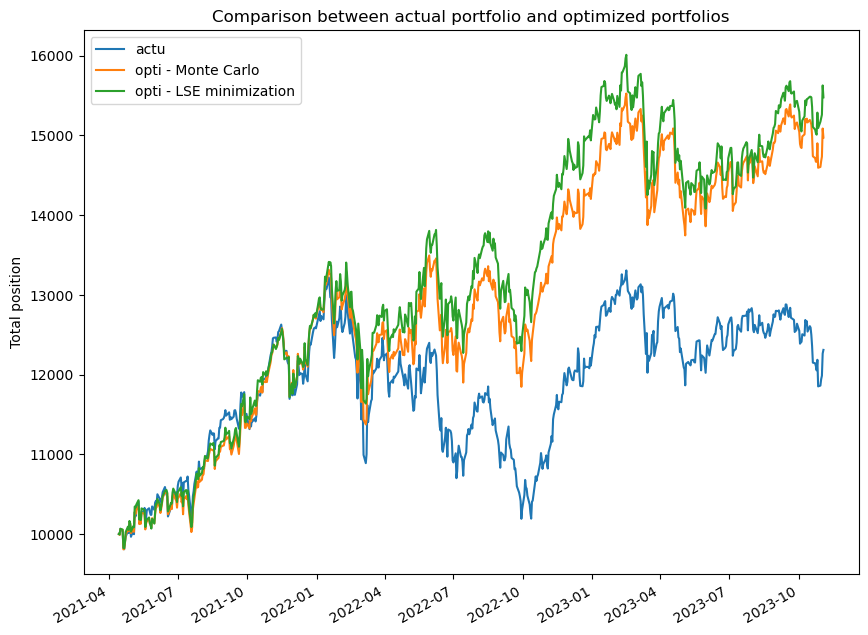

In [284]:
# Portfolio Benchmmark updated
portfolio['Total pos'].plot(figsize=(10,8), label='actu')
portfolio_opti_mc['Total pos'].plot(figsize=(10,8), label='opti - Monte Carlo')
portfolio_opti_mm['Total pos'].plot(figsize=(10,8), label='opti - LSE minimization')
plt.title('Comparison between actual portfolio and optimized portfolios')
plt.ylabel('Total position')
plt.legend()

The LSE approach allows to perform much better on the long term . In general, note that the optimized portfolios perform far better than the actual portfolio

### Efficient frontier
The approach used so far was based on maximizing the ASR, thus indirectly maximizing the return and minimizing the risk at the same time. A cornerstone of the MPT is to see on a step above by looking at the ability to maximize the return for a given risk. In fact, Not all the investors have the same level of risk. Hence, an investor can seek a portfolio with securities offering high returns but with a combination of stock's risk that is lower than the risk of individual stocks. It's important that the stocks' risks are less synchronized (lowe covariance) in order to lower the general risk.

An efficient frontier does this job by providing a graphical representation of those specific portfolios (the risk tolerance and return are given respectively on the x and yaxis). 

Its implementation is quite similar to the LSE optimization problem defined earlier. The only difference resides in the following points :

**- if the frontier is efficient on the volatility, then the function to minimize becomes the volatility. Otherwise, the function to minimize is the negative value of the return (in order to maximize the return)**

**- if the frontier is efficient on the volatility, then we define and parse a range of possible returns. Otherwise, we define and parse and range of possible volatilities** 

**- we always check the metric that is used during parsing is always close to its value found during the optimization algorithm**


In [285]:
## Compute the efficient frontier
frontier_volatility = [] # efficient on a volatility basis

# The range of returns should be taken from the Monte Carlo shots to ease the computation
return_max=max(ret_arr)
return_min=min(ret_arr)
frontier_return = np.linspace(return_min,return_max,100) # 100 defined points 
# beware : the more points you have, greater is the computing time

# Function to minimize
def minimize_volatility(weights):
    return portfolio_metrics(weights)[1]

for possible_return in frontier_return: 
    # Constraints
    cons_new =({'type': 'eq','fun': check_sum},
           {'type': 'eq','fun': lambda w: portfolio_metrics(w)[0] - possible_return}) 
    
    # LSE optimization   
    opt_results_vol = minimize(minimize_volatility,init_guess,method='SLSQP',
                               bounds = bounds, constraints = cons_new) # the boundaries are the same
    
    # Save the results
    frontier_volatility.append(opt_results_vol['fun'])

print('done')

done


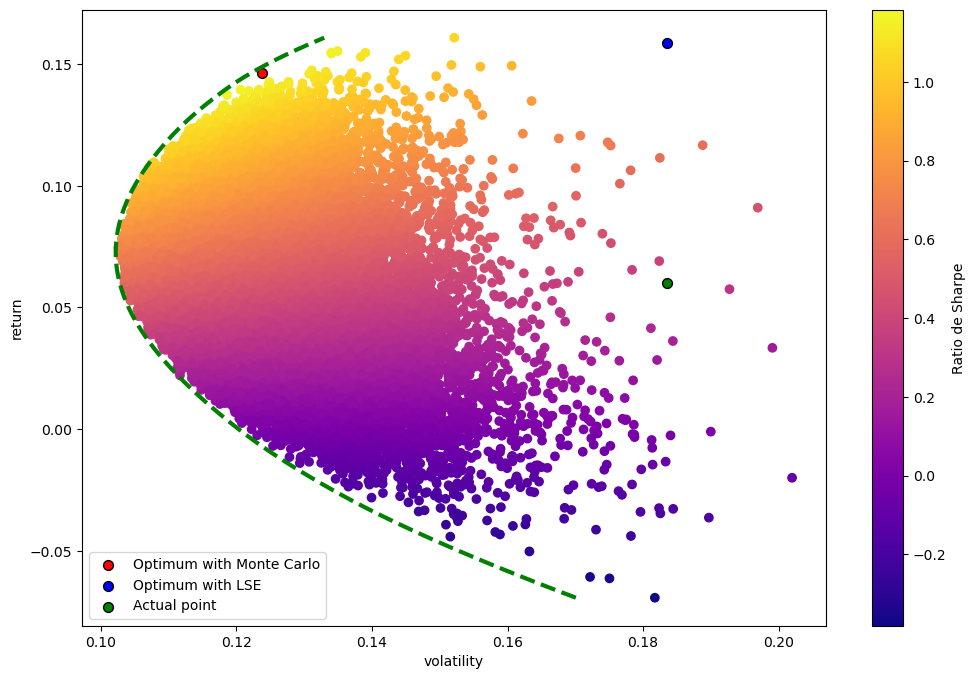

In [286]:
# plot the efficient frontier
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('volatility')
plt.ylabel('return')

vol_opti_mm = get_ret_vol_arr(opt_results.x)[1]
ret_opti_mm = get_ret_vol_arr(opt_results.x)[0]

plt.scatter(vol_opti,ret_opti,c='red',s=50, edgecolors ='black',label = 'Optimum with Monte Carlo')
plt.scatter(vol_opti_mm,ret_opti_mm,c='blue',s=50, edgecolors ='black',label = 'Optimum with LSE')
plt.scatter(vol_actu,ret_actu,c='green',s=50, edgecolors ='black',label = 'Actual point')
plt.plot(frontier_volatility,frontier_return,'g--',linewidth=3)
plt.legend()

Let's check from our given portfolio what return can we expect for a given risk

In [294]:
# For a given risk, what is the optimal return we can expect and its associated portfolio allocations ?
def get_portfolio_from_risk(given_risk ,isStdRisk):

    # Constraint on the weight and the closure between the calculated return from weight and its target
    cons =({'type': 'eq','fun': check_sum},
           {'type': 'eq','fun': lambda w: portfolio_metrics(w,isStdRisk)[1] - given_risk}) 

    # LSE optimization   
    opt_results_vol = minimize(lambda w: -portfolio_metrics(w,isStdRisk)[0],
                               init_guess,
                               method='SLSQP',
                               bounds = bounds, 
                               constraints = cons_new)
    
    # Extract the optimal data
    ret_opti = - opt_results_vol['fun'] 
    w_opti = opt_results_vol['x'] 
    
    return ret_opti, w_opti

In [295]:
given_risk = 0.16

portfolio_A = get_portfolio_from_risk(given_risk,  isStdRisk = False)
portfolio_B = get_portfolio_from_risk(given_risk,  isStdRisk = True)

print('-------------------------------')
print('-----------portfolio A---------')
print('For a ', given_risk,' level of risk, the optimal expected return is : ', round(100*portfolio_A[0],1), '%')
print('for a following portfolio allocation :')
for ind in range(len(stck_names)):
    print(stck_names[ind], ' ', round(100*portfolio_A[1][ind]),'%')

print('-------------------------------')
print('-----------portfolio B---------')
print('For a ', given_risk,' level of risk,  the optimal expected return is : ', round(100*portfolio_B[0],1), '%')
print('for a following portfolio allocation :')
for ind in range(len(stck_names)):
    print(stck_names[ind], ' ', round(100*portfolio_B[1][ind]),'%')

-------------------------------
-----------portfolio A---------
For a  0.16  level of risk, the optimal expected return is :  16.1 %
for a following portfolio allocation :
BNP   13 %
IPS   24 %
SAN   5 %
MMT   1 %
DBG   1 %
TTE   36 %
ACN   12 %
STM   8 %
-------------------------------
-----------portfolio B---------
For a  0.16  level of risk,  the optimal expected return is :  16.1 %
for a following portfolio allocation :
BNP   13 %
IPS   24 %
SAN   5 %
MMT   1 %
DBG   1 %
TTE   36 %
ACN   12 %
STM   8 %


With the definition of the frontiers, one can check for the expected return with the maximum risk it can wield. We also saw that it's possible to get the best trade off by optimising the ASR. However, note that the expected performance is conditioned by the choice of the assets to put inside the portfolio (which can be overcome somehow by choosing for instance the best stocks of the CAC 40 or S&P500). Besides, another more important issue is the use of past data that doesn't guarantee that the expected performance will be reached in the future.

To cope with this issue, 2 methods can be envisionned using time series analysis :

**- Approach A :** the historical data are splitted in half. The 1st half are used to train the model and optimized the weights and the 2nd half is used to test 

**- Approach B :** we forecast the prices of each stock (using models such as GARCH, SARIMA, Holt Winters, Neural Networks, etc) and use the future prices as test data. all the historical data are only used for the training

It's important in each case that the train and test data have the same duration. 